In [13]:
import yaml
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import index

# teleconnection config details

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

# Opening yml files

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

# Opening dataset file

infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl'] # single quantity name to be standardize

In [14]:
NAO = index.station_based_index(field,namelist,telecname=telecname)

/work/users/mnurisso/mambaforge/envs/aqua/lib/python3.11/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


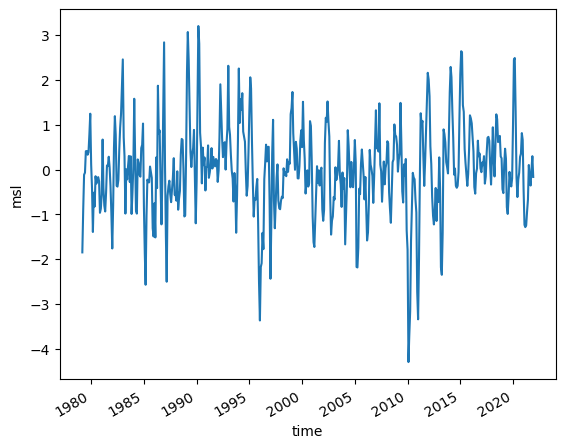

In [15]:
NAO.plot()